In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
car=pd.read_csv("Cars93.CSV")
car.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
columns = ["Manufacturer","Model","Type","Price",
"MPG.city","MPG.highway","Horsepower","Rear.seat.room","Passengers"]

In [4]:
car[columns].head()

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,Horsepower,Rear.seat.room,Passengers
0,Acura,Integra,Small,15.9,25,31,140,26.5,5
1,Acura,Legend,Midsize,33.9,18,25,200,30.0,5
2,Audi,90,Compact,29.1,20,26,172,28.0,5
3,Audi,100,Midsize,37.7,19,26,172,31.0,6
4,BMW,535i,Midsize,30.0,22,30,208,27.0,4


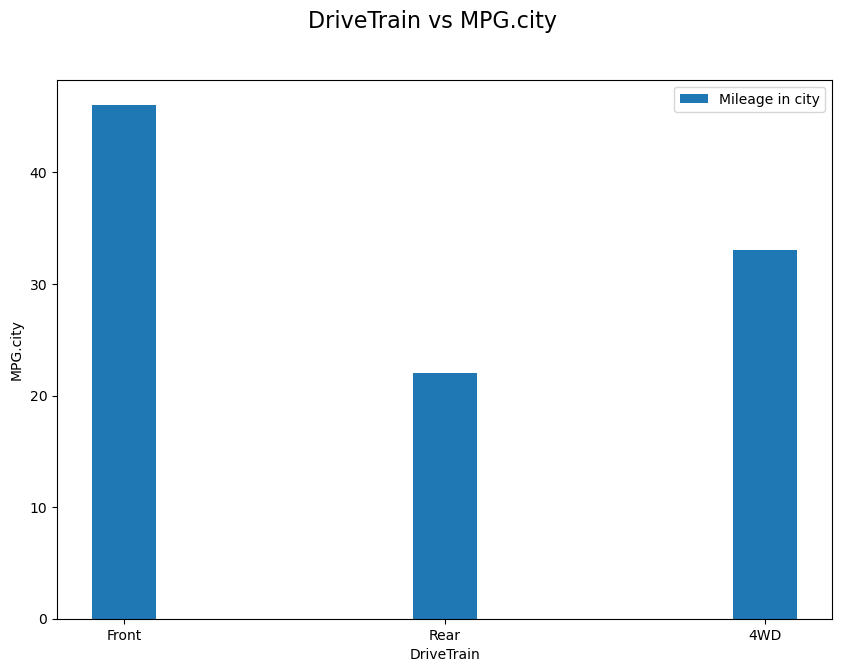

In [5]:
#width,height
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
#code to create bar chart
plt.bar(car["DriveTrain"], car["MPG.city"],width=0.2,label="Mileage in city")
#title and label
plt.suptitle("DriveTrain vs MPG.city",fontsize=16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
#legend
plt.legend()


Text(0, 0.5, 'DriveTrain')

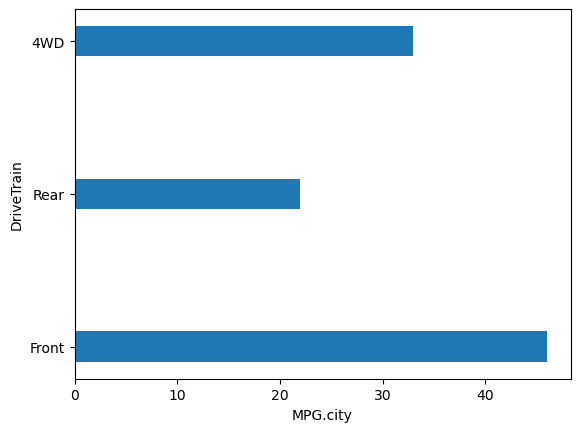

In [7]:
#horizontal bar graph
plt.barh(car["DriveTrain"], car["MPG.city"],height=0.2,label="Mileage in city")
plt.xlabel("MPG.city")
plt.ylabel("DriveTrain")


In [8]:
#Use the following code snippet to filter the unique values of no. of passengers a car can carry
car["Passengers"].unique()


array([5, 6, 4, 7, 8, 2], dtype=int64)

In [9]:
#Use the following code snippet to filter the unique values of Types of car.
car["Type"].unique()


array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [10]:
#Use the following code snippet to filter the data and obtain the target columns into a separate dataframe.
grouped_data = car[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size().unstack().reset_index()


In [11]:
grouped_data = car[["Passengers","Type"]].groupby(by= ["Passengers","Type"]).size()


In [17]:
grouped_data

Type,Passengers,Compact,Large,Midsize,Small,Sporty,Van
0,2,NaN,NaN,NaN,NaN,2.0,NaN
1,4,1.0,NaN,2.0,8.0,12.0,NaN
2,5,13.0,NaN,15.0,13.0,NaN,NaN
3,6,2.0,11.0,5.0,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,8.0
5,8,NaN,NaN,NaN,NaN,NaN,1.0


In [13]:
grouped_data = car[["Passengers","Type"]].groupby(by= ["Passengers","Type"]).size().unstack()


In [15]:
grouped_data.head()

Type,Compact,Large,Midsize,Small,Sporty,Van
Passengers,,,,,,
2,NaN,NaN,NaN,NaN,2.0,NaN
4,1.0,NaN,2.0,8.0,12.0,NaN
5,13.0,NaN,15.0,13.0,NaN,NaN
6,2.0,11.0,5.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,8.0


In [16]:
grouped_data = car[["Passengers","Type"]].groupby(by= ["Passengers","Type"]).size().unstack().reset_index()


In [18]:
grouped_data

Type,Passengers,Compact,Large,Midsize,Small,Sporty,Van
0,2,NaN,NaN,NaN,NaN,2.0,NaN
1,4,1.0,NaN,2.0,8.0,12.0,NaN
2,5,13.0,NaN,15.0,13.0,NaN,NaN
3,6,2.0,11.0,5.0,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,8.0
5,8,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='Passengers'>

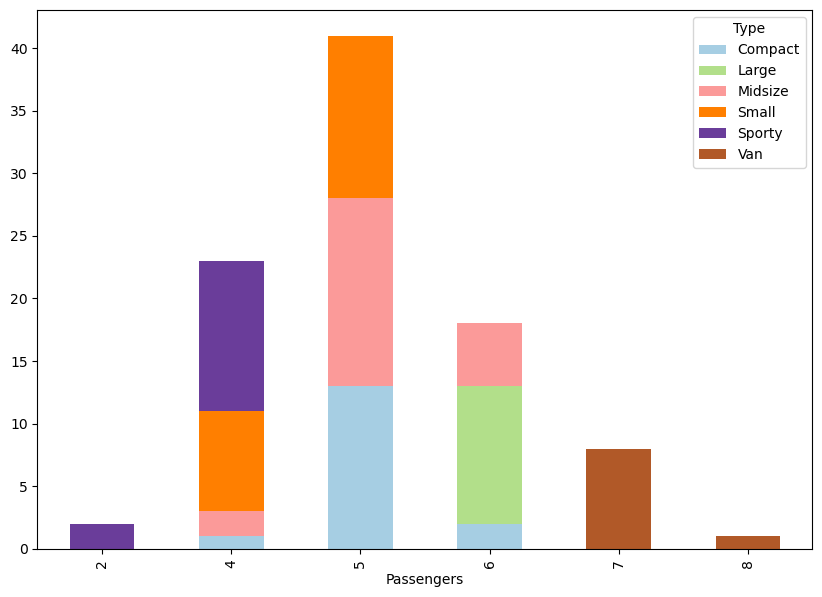

In [19]:
#Stacked Bar Graph can be plotted using the grouped data, as follows:
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.Paired,figsize=(10,7))


<Axes: xlabel='Passengers'>

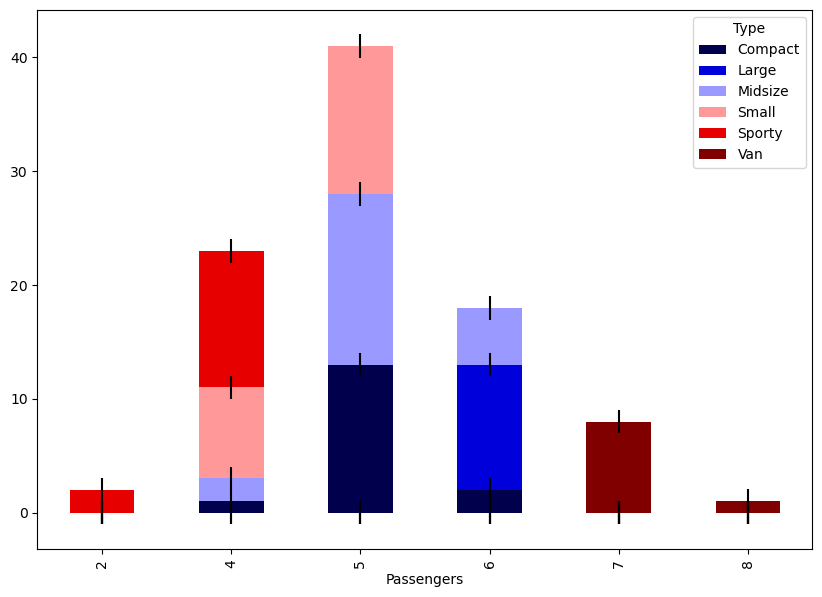

In [20]:
#Error bars can be added to the stacked bar graph with the 'yerr' argument as follows
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.seismic,figsize=(10,7),yerr=np.std(car["Passengers"]))


In [21]:
car["DriveTrain"].unique()


array(['Front', 'Rear', '4WD'], dtype=object)

In [22]:
grouped_cars = car[["MPG.city","MPG.highway","RPM","DriveTrain"]].groupby(by="DriveTrain").mean().T
grouped_cars


DriveTrain,4WD,Front,Rear
MPG.city,20.5,23.522388,18.6875
MPG.highway,25.8,30.238806,26.3125
RPM,5120.0,5374.626866,4987.5000


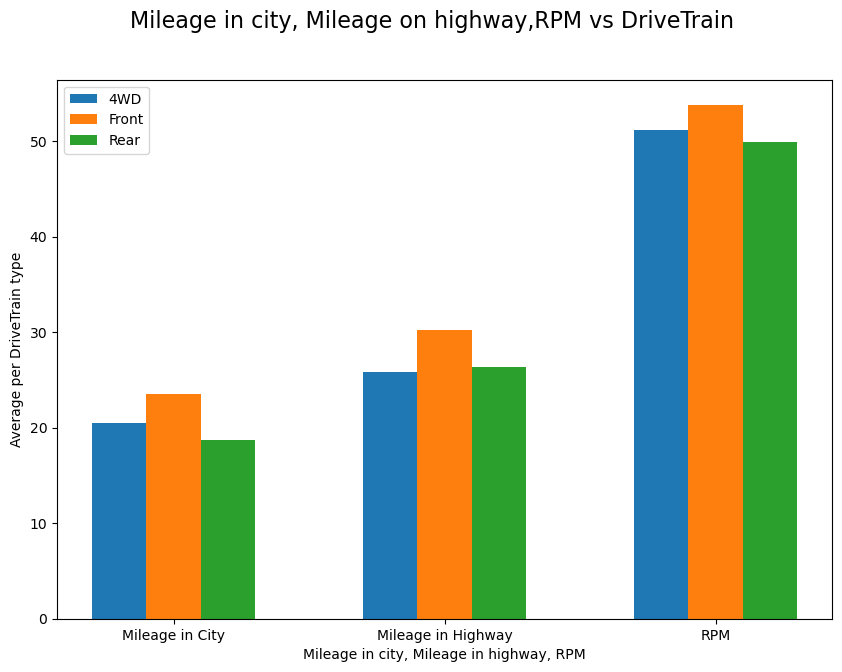

In [23]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
grouped_cars.loc['RPM'] /= 100
width=0.2	# We assign the value of the width of the bar and on the number of groups.
ind=list(range(len(car['DriveTrain'].unique()))) 
plt.bar([i for i in ind], height=grouped_cars["4WD"], label="4WD", width=width)
plt.bar([i+width for i in ind], height=grouped_cars["Front"], width=width, bottom=0, label="Front")
plt.bar([i+width*2 for i in ind], height=grouped_cars["Rear"], label="Rear", width=width, bottom=0)
plt.suptitle("Mileage in city, Mileage on highway,RPM vs DriveTrain", fontsize=16)
plt.xlabel("Mileage in city, Mileage in highway, RPM")
plt.ylabel("Average per DriveTrain type")
plt.xticks([i+width for i in ind],["Mileage in City","Mileage in Highway","RPM"])
plt.legend()


<BarContainer object of 3 artists>

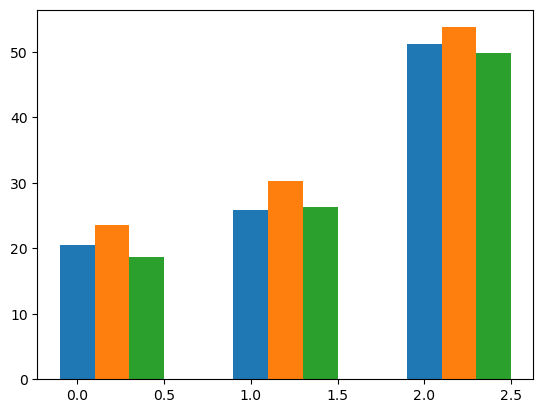

In [24]:
plt.bar([i for i in ind], height=grouped_cars["4WD"], label="4WD", width=width)
plt.bar([i+width for i in ind], height=grouped_cars["Front"], width=width, bottom=0, label="Front")
plt.bar([i+width*2 for i in ind], height=grouped_cars["Rear"], label="Rear", width=width, bottom=0)


([<matplotlib.axis.XTick at 0x180bc853f90>,
 [Text(0.2, 0, 'Mileage in City'),
  Text(1.2, 0, 'Mileage in Highway'),
  Text(2.2, 0, 'RPM')])

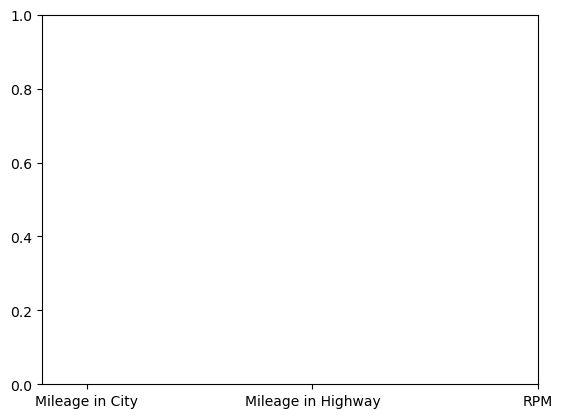

In [25]:
plt.xticks([i+width for i in ind],["Mileage in City","Mileage in Highway","RPM"])
